<h1>Importing Libraries and Database </h1>

In [102]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [103]:
from src.data import data_collection

In [188]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [105]:
DBNAME = "opportunity_youth"

In [106]:
conn = psycopg2.connect(dbname=DBNAME)

<h1>Querying Data</h1>
We chose Puma's based on the school districs that were shown in the 2016 Report: Auburn, Federal Way, Highline, Kent, Renton, (South) Seattle, and Tukwila was what the origonal data included. We filtered by Age, Job status, and school status based on the definition of oppurtunity youth. 

In [107]:
# puma correlate to South King county regions
# esr = '3','6' is the unemployed
# fschp = '0', is not enrolled in school
oy_df = pd.read_sql('''SELECT * 
FROM pums_2017
WHERE puma IN ('11612','11613','11614','11615','11604', '11610', '11611')
AND agep BETWEEN '16' AND '24'
AND fschp = '0'
AND esr IN ('3','6')
AND SCH IN ('0','1')
;''', conn)

<h1>Estimating Population of Opportunity Youth</h1>
I created a list of the population by using the sample weighted multiplier. Then I grouped them by each Puma(region). From that I took the sum of all the regions to get the total.


In [163]:
#a list of the estimated population by each region and the total population for all 7 regions
population = oy_df.groupby('puma')['pwgtp'].sum()   # pwgtp was the weight each person held 
estimated_population = sum(population)
estimated_population

10850.0

<h1>Setting up data for graphing</h1>
I hardcoded the Names of the pumas as a value in the region dictionary. The reason I did this was because I knew these weren't going to change during our project. 
Another option would have been to find the dataframe table that had a list of puma names and join them so you wouldnt have to hardcode it. 

In [178]:
# dictionary of Puma number, and then sorting it by the OY population of each puma
# Used to organize the names of the puma which wasnt included in the dataframe
import operator
region_dic = {'11612': [population['11612'],'Federal Way,Des moines Cities & Vashon island' ],
 '11613': [population['11613'],'Kent City'],
 '11611': [population['11611'],'Burien, SeaTac, Tukwita Cities'],
 '11614': [population['11614'],'Auburn City & Lakeland'],
 '11604': [population['11604'],'South East Seattle'],
 '11615': [population['11615'],'Maple Valley, Covingtion and Enumclaw Cities'],
 '11610': [population['11610'],'Renton City, Fairwood, Bryn Mawr and Skyway']}

sort_region_dic = dict(sorted(region_dic.items(), key=operator.itemgetter(1), reverse = True))

I created two lists from the sorted region dictionary that are used as the x and y axis on the graph.

In [154]:
city_list = [item[1] for item in sort_region_dic.values()]  # created a list of the cities based on the region_dic 
estimated_population_region = [item[0] for item in sort_region_dic.values()] # created a listed of the estimated population per region

In [174]:
# adjusted city list so the string is on muliple lines in the graph
city_list_adj = [sub.replace(',',',\n').replace(' &',',\n') for sub in city_list]

<h1>Plotting Information</h1>
Created a bar graph comparing the Estimated Population per region 

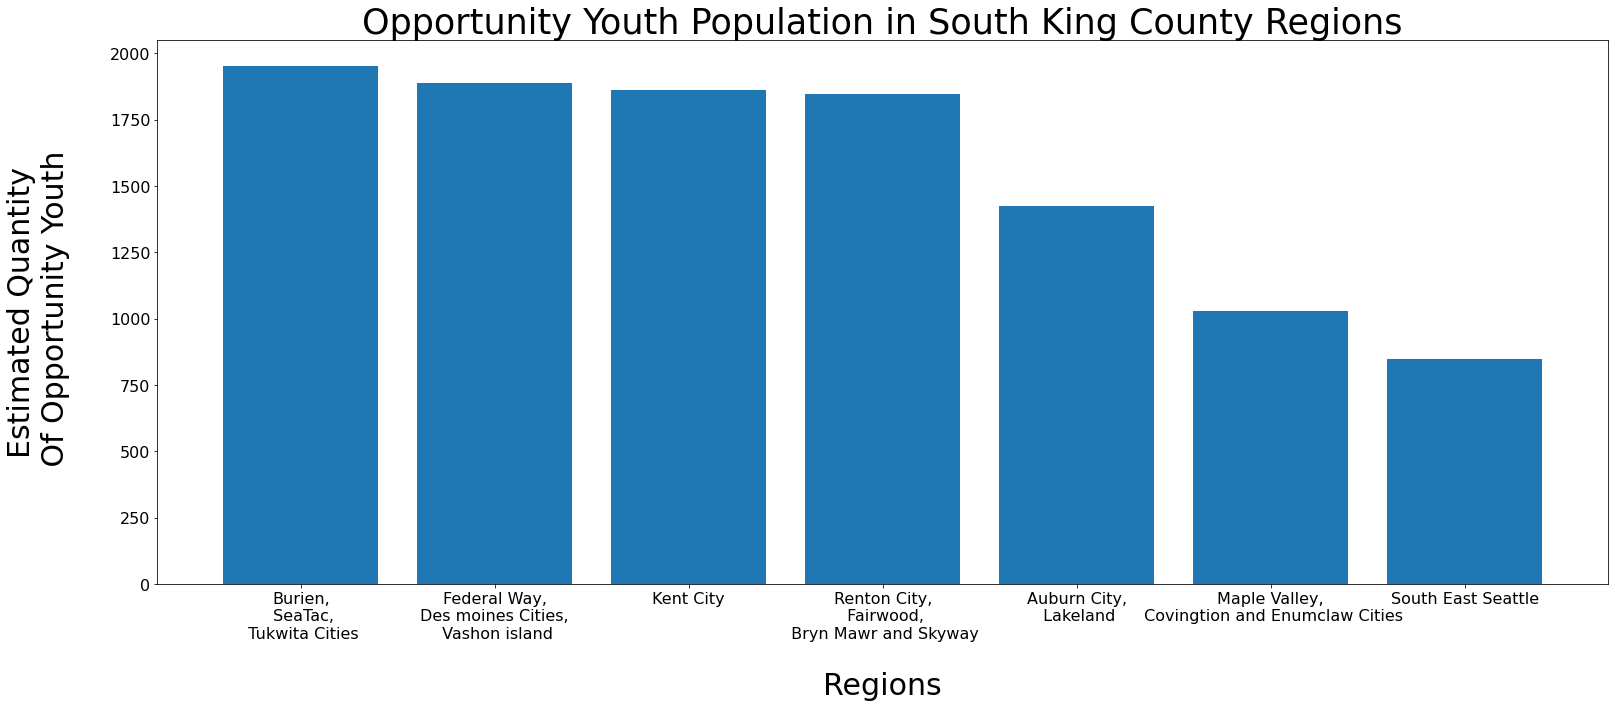

In [196]:
#Printing a Bar graph of the population estimate per each puma(region)
figure, ax = plt.subplots(1, 1, figsize = (26,10));

x = city_list_adj;
y = estimated_population_region;
ax.bar(x, y);


ax.set_ylabel('Estimated Quantity\n Of Opportunity Youth', fontsize = 30, rotation = 90, labelpad = 40);
ax.set_xlabel('Regions', fontsize = 30, labelpad = 30);
ax.set_title('Opportunity Youth Population in South King County Regions', fontsize = 35);
ax.set_xticklabels(city_list_adj, wrap = True);
ax.tick_params(axis='both', which='major', labelsize=16)
                   

In [198]:
figure.savefig('OYPopulationByRegion.png',dpi=300, bbox_inches='tight') 